In [76]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib.backends.backend_pdf import PdfPages
from scipy import stats
import matplotlib.pyplot as plt

''' global plotting settings '''
#plt.style.use('seaborn-paper')
# Update the matplotlib configuration parameters:
plt.rcParams.update({'text.usetex': False,
                     'lines.linewidth': 1.5,
                     'font.family': 'sans-serif',
                     'font.serif': 'Helvetica',
                     'font.size': 14,
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'axes.grid': True,
                     'grid.alpha': 0.53,
                     'lines.markersize': 10,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 'medium',
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.1,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'figure.figsize': (12,8),
                     'savefig.dpi': 100,
                     'pdf.compression': 9})

figlist = []  # for saving figs

""" this notebook is for conducting data analysis on lab 1 for PHYS375, Spring 2020 """

' this notebook is for conducting data analysis on lab 1 for PHYS375, Spring 2020 '

In [77]:
""" global settings for notebook """

data_folder = "../data/" 
refraction_data_path = data_folder + "refraction_angle{num}.txt"  # /refraction_angle[neg][##].txt
test_path = data_folder + "zero_test_{medium}_{num}.txt"

$$ n^2 = sin^2 \theta \ [1 + \left[ \frac {cos\theta} {sin(\theta) - \frac{d}{L} } \right] ^2 ] $$ 

$$ d = \frac {L sin(\theta - (\alpha))} {cos(\alpha)} $$


In [78]:
""" import data """

# arrays to hold all data sources [10deg, 20deg, 30deg, 40deg, 50deg] and [-10deg, -20deg, -30deg, -40deg, -50deg] 
refraction_data_CW, refraction_data_CCW = [], []

for angle in ["10", "20", "30", "40", "50"]:  # use these strings to grab each data file
    refraction_data_CW.append(np.loadtxt(refraction_data_path.format(num=angle)))  # see cell above for .format() vars

for angle in ["neg50", "neg40", "neg30", "neg20", "neg10"]:  # use these strings to grab each data file
    refraction_data_CCW.append(np.loadtxt(refraction_data_path.format(num=angle)))  # see cell above for .format() vars

reference_angle_data = np.loadtxt(refraction_data_path.format(num="0"))

""" 
each entry in refraction_data_CW is a 2xN list where N is the number of data points. 
the first col is position, second col is voltage.
"""

' \neach entry in refraction_data_CW is a 2xN list where N is the number of data points. \nthe first col is position, second col is voltage.\n'

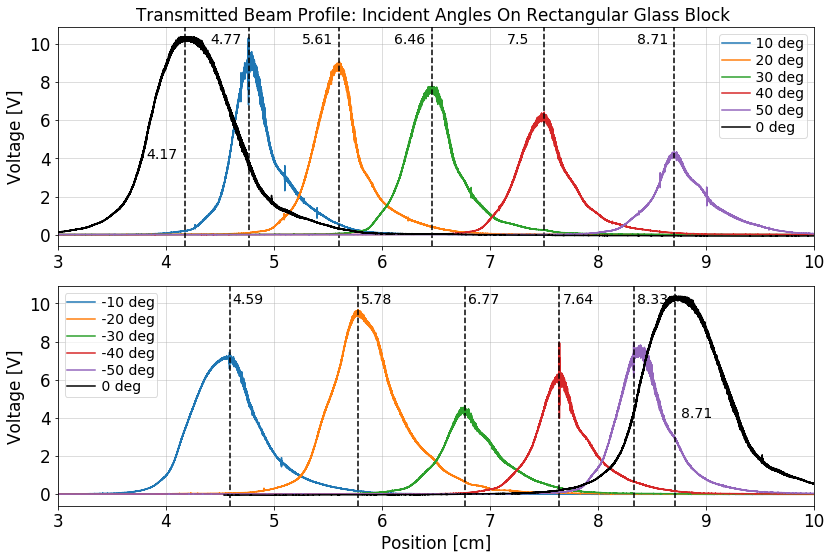

In [79]:
###### """ refraction angles +10 through +50 """

CW_curves = ["10 deg", "20 deg", "30 deg", "40 deg", "50 deg"]
CCW_curves = ["-10 deg", "-20 deg", "-30 deg", "-40 deg", "-50 deg"]

CW_peaks, CCW_peaks = {}, {}  # empty dictionaries
fig = plt.figure()


''' 1st plot with CW values '''
s1 = fig.add_subplot(2,1,1)  # upper plot for + values

for index, data_set in enumerate(refraction_data_CW):  #  data_set is a 2xN list
      # extract (x, y) for plotting, and then plot line with a label from CW_curves 
    x_vals, y_vals = data_set[:,0], data_set[:,1] 
    s1.plot(x_vals, y_vals, label=" " + CW_curves[index]) 
    
      # find peaks
    peaks, _ = sp.signal.find_peaks(y_vals, prominence=3 )  # returns the location of all peaks in the signal
    peak_loc = int(np.floor((len(peaks))/2))  # grab the middlemost peak, error prone
      
      # get x_value of peak in cm
    peak_x_position = x_vals[peaks[peak_loc]]
    
      # plot a vertical line and label
    s1.axvline(x_vals[peaks[peak_loc]], ymin=0, ymax=1, color="k", linestyle="--")
    s1.text(peak_x_position - 0.35, y=10, s=str(round(peak_x_position, 2)))
    
      # save peaks for later, use dictionary to save as format (key : val) -> (deg : position)
    CW_peaks[CW_curves[index][0:2]] = peak_x_position
    
    
''' 2nd plot with CCW values '''
s2 = fig.add_subplot(2,1,2)  # upper plot for + values

for index, data_set in enumerate(refraction_data_CCW):  #  data_set is a 2xN list
      # extract (x, y) for plotting, and then plot line with a label from CCW_curves 
    x_vals, y_vals = data_set[:,0], data_set[:,1] 
    s2.plot(x_vals, y_vals, label=" " + CCW_curves[index]) 
    
      # find peaks
    peaks, _ = sp.signal.find_peaks(y_vals, prominence=3 )  # returns the location of all peaks in the signal
    peak_loc = int(np.floor((len(peaks))/2))  # grab the middlemost peak, error prone
      
      # get x_value of peak in cm
    peak_x_position = x_vals[peaks[peak_loc]]
    
      # plot a vertical line and label
    s2.axvline(x_vals[peaks[peak_loc]], ymin=0, ymax=1, color="k", linestyle="--")
    s2.text(peak_x_position + 0.03, y=10, s=str(round(peak_x_position, 2)))
    
      # save peaks for later, use dictionary to save as format (key : val) -> (deg : position)
    CCW_peaks[CCW_curves[index][0:3]] = peak_x_position
    
    
''' now add top reference signal '''

  # take data and put it in a variable for readability
x_vals, y_vals = reference_angle_data[:,0], reference_angle_data[:,1] 
s1.plot(x_vals, y_vals, color='k', label = " 0 deg")

  # get peak of top reference signal
peaks, _ = sp.signal.find_peaks(y_vals[0:60000], prominence=8, width=4, distance=1000)  # returns the location of the peak in the signal
peak_loc = int(np.floor((len(peaks))/2))  # grab middle peak
deg0_peak_x_position_CW = x_vals[peaks[peak_loc]]

  # plot vertical lines with labels
s1.axvline(deg0_peak_x_position_CW, ymin=0, ymax=1, color="k", linestyle="--")
s1.text(deg0_peak_x_position_CW - 0.35, y=4, s=str(round(deg0_peak_x_position_CW, 2)))


''' now add bottom reference signal '''

  # take data and put it in a variable for readability
x_vals, y_vals = reference_angle_data[:,0] + 4.54, reference_angle_data[:,1] 
s2.plot(x_vals, y_vals, color='k', label = " 0 deg")

  # get peak of bottom reference signal
peaks, _ = sp.signal.find_peaks(y_vals[0:60000], prominence=8, width=4, distance=1000)  # returns the location of the peak in the signal
peak_loc = int(np.floor((len(peaks))/2))  # grab middle peak
deg0_peak_x_position_CCW = x_vals[peaks[peak_loc]]
    
  # plot vertical lines with labels
s2.axvline(deg0_peak_x_position_CCW, ymin=0, ymax=1, color="k", linestyle="--")
s2.text(deg0_peak_x_position_CCW + 0.05, y=4, s=str(round(deg0_peak_x_position_CCW, 2)))


''' general plot settings '''       
s1.set_title("Transmitted Beam Profile: Incident Angles On Rectangular Glass Block ")

s1.set_xlim([3, 10])
s2.set_xlim([3, 10])   

s1.legend(loc="upper right")
s2.legend(loc="upper left") 

s2.set_xlabel("Position [cm]")
s2.set_ylabel("Voltage [V]")
s1.set_ylabel("Voltage [V]")

''' show plot, save to pdfpages '''
plt.tight_layout()
plt.show()
figlist += [fig]  # save to pdf later

In [80]:
''' save figs '''
pp = PdfPages('Transmitted Beam Profile.pdf')
for fig in figlist:
    pp.savefig(fig)
pp.close()

$$ d = \frac {L sin(\theta - \alpha)} {cos(\alpha)} $$

$$ \frac {d} {L} = \frac {sin(\theta) cos(\alpha) - cos(\theta) sin(\alpha)} {cos(\alpha)} $$

$$ \frac {d} {L} = sin(\theta) - cos(\theta) tan(\alpha) $$ 

$$ \frac {sin(\theta) - \frac {d} {L}} {cos(\theta)} = tan(\alpha) $$


In [81]:
""" calculate refraction angles """
L = 11.91  # thickness of block, [cm], measured in lab
zero_deg_d_CW = deg0_peak_x_position_CW
zero_deg_d_CCW = deg0_peak_x_position_CCW

print("CW Angles : Refraction Angle")
for angle in CW_peaks:
    theta = int(angle)*0.0174533  # deg to radians conversion
    d = np.abs(CW_peaks[angle] - zero_deg_d_CW)
    alpha = np.arctan((np.sin(theta) - (d/L))/(np.cos(theta)))
    print(angle, ":" , round(alpha/0.0174533, 2))
    
print("\nCCW Angles : Refraction Angle")
for angle in CCW_peaks:
    theta = int(angle)*0.0174533  # deg to radians conversion
    d = np.abs(CCW_peaks[angle] - zero_deg_d_CW)
    alpha = np.arctan((np.sin(theta) - (d/L))/(np.cos(theta)))
    print(angle, ":" , round(alpha/0.0174533, 2)/2)
    

CW Angles : Refraction Angle
10 : 7.17
20 : 13.28
30 : 19.57
40 : 25.38
50 : 30.95

CCW Angles : Refraction Angle
-10 : -5.98
-20 : -13.45
-30 : -19.825
-40 : -25.325
-50 : -30.02


$$ n^2 = sin^2 \theta \ [1 + \left[ \frac {cos\theta} {sin(\theta) - \frac{d}{L} } \right] ^2 ] $$ 

In [82]:
""" calculate index of refraction """
L = 11.91  # thickness of block, [cm], measured in lab
zero_deg_d_CW = deg0_peak_x_position_CW
zero_deg_d_CCW = deg0_peak_x_position_CCW
    
print("CW Angles : Index of Refraction")
for angle in CW_peaks:
    theta = int(angle)*0.0174533  # deg to radians conversion
    d = np.abs(CW_peaks[angle] - zero_deg_d_CW)
    n = np.sqrt( (np.sin(theta)**2) * (1 + ((np.cos(theta))/(np.sin(theta) - (d/L)))**2) )
    print(angle, ":" , round(n, 3))

print("\nCCW Angles : Index of Refraction")
for angle in CCW_peaks:
    theta = np.abs(int(angle)*0.0174533)  # deg to radians conversion
    d = np.abs(CCW_peaks[angle] - zero_deg_d_CW)
    
    n = np.sqrt( (np.sin(theta)**2) * (1 + ((np.cos(theta))/(np.sin(theta) - (d/L)))**2) )
    print(angle, ":" , round(n, 3))

CW Angles : Index of Refraction
10 : 1.391
20 : 1.489
30 : 1.493
40 : 1.5
50 : 1.489

CCW Angles : Index of Refraction
-10 : 1.245
-20 : 1.588
-30 : 1.613
-40 : 1.541
-50 : 1.407


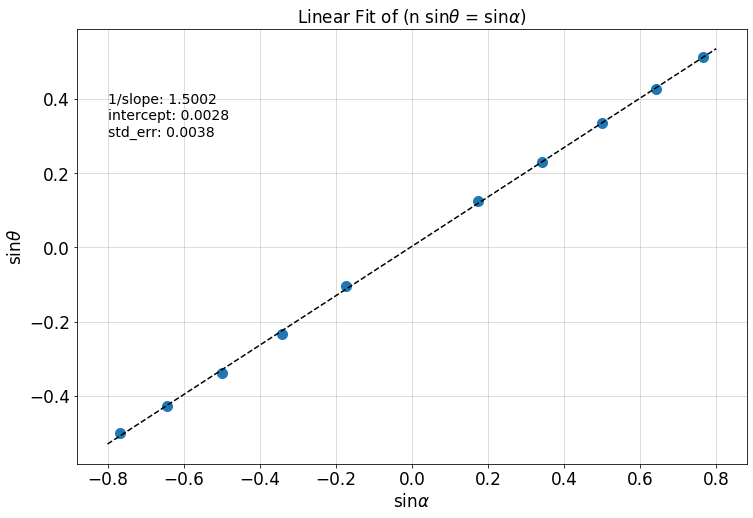

In [83]:
""" sine(refraction) vs sin(incidence) """

# this is really bad coding but whatever
refr_angles = [(-10, -5.98), (-20, -13.45), (-30, -19.825), 
                (-40, -25.325), (-50, -30.02), (50, 30.95), 
                (40, 25.38), (30, 19.57), (20, 13.28),
                (10, 7.17)]

refr_indexes = [(-10, 1.245), (-20, 1.588), (-30, 1.613), 
                (-40, 1.541), (-50, 1.407), (50, 1.489), 
                (40, 1.500), (30, 1.493), (20, 1.489),
                (10, 1.391)]  

n_sin_refraction, sin_incidence = {}, {}

for thing in refr_angles: 
    sin_incidence[thing[0]] = np.sin(thing[1] * 0.0174533)
    
for thing in refr_indexes:  # key : val  -->  inc : n * sin(refr)
    n_sin_refraction[thing[0]] = np.sin(thing[0] * 0.0174533)  
    
x_vals, y_vals = [], []

for key in sin_incidence:
    y_vals.append(sin_incidence[key])
    
for key in n_sin_refraction:
    x_vals.append(n_sin_refraction[key])
    

slope, intercept, r_value, p_value, std_err = stats.linregress(x_vals, y_vals)

x_fit = np.linspace(-0.8, 0.8, 50)
y_fit = x_fit*slope + intercept

''' plotting!!! '''
fig = plt.figure()

s1 = fig.add_subplot(1,1,1)
s1.scatter(x_vals, y_vals)
s1.plot(x_fit, y_fit, linestyle="--", color="k")
s1.text(-0.8, 0.3, s="1/slope: {s:.4f} \nintercept: {i:.4f} \nstd_err: {e:.4f}".format(s=(1/slope), i=intercept, e=std_err))

plt.title("Linear Fit of (n sin$\\theta$ = sin$\\alpha$)")
plt.xlabel("sin$\\alpha$")
plt.ylabel("sin$\\theta$")

figlist2 = [fig]

In [84]:
''' save figs '''
pp = PdfPages('LinearFit.pdf')
for fig in figlist2:
    pp.savefig(fig)
pp.close()